In [1]:
import pandas as pd
import numpy as np
import re,tqdm
spec_op = pd.read_csv("./data_specifications/options_spec.csv",low_memory=False)
spec_fin = pd.read_csv("./data_specifications/stock_fin_spec.csv",low_memory=False)
spec_l = pd.read_csv("./data_specifications/stock_list_spec.csv",low_memory=False)
spec_pr = pd.read_csv("./data_specifications/stock_price_spec.csv",low_memory=False)
spec_trd = pd.read_csv("./data_specifications/trades_spec.csv",low_memory=False).drop(columns=['index'])

test_fin = pd.read_csv("./example_test_files/financials.csv",low_memory=False)
test_op = pd.read_csv("./example_test_files/options.csv",low_memory=False)
test_sub = pd.read_csv("./example_test_files/sample_submission.csv",low_memory=False)
test_sec_pr = pd.read_csv("./example_test_files/secondary_stock_prices.csv",low_memory=False)
test_pr = pd.read_csv("./example_test_files/stock_prices.csv",low_memory=False)
test_trd = pd.read_csv("./example_test_files/trades.csv",low_memory=False)

sup_fin = pd.read_csv("./supplemental_files/financials.csv",low_memory=False)
sup_op = pd.read_csv("./supplemental_files/options.csv",low_memory=False)
sup_sec_pr = pd.read_csv("./supplemental_files/secondary_stock_prices.csv",low_memory=False)
sup_pr = pd.read_csv("./supplemental_files/stock_prices.csv",low_memory=False)
sup_trd = pd.read_csv("./supplemental_files/trades.csv",low_memory=False)

train_fin = pd.read_csv("./train_files/financials.csv",low_memory=False)
train_op = pd.read_csv("./train_files/options.csv",low_memory=False)
train_sec_pr = pd.read_csv("./train_files/secondary_stock_prices.csv",low_memory=False)
train_pr = pd.read_csv("./train_files/stock_prices.csv",low_memory=False)
train_trd = pd.read_csv("./train_files/trades.csv",low_memory=False)

stock_list = pd.read_csv("stock_list.csv",low_memory=False)

In [42]:
for _,df0 in stock_list.groupby("17SectorName"):
    print(df0)
    break

      SecuritiesCode  EffectiveDate  \
1               1305       20211230   
2               1306       20211230   
3               1308       20211230   
4               1309       20211230   
5               1311       20211230   
...              ...            ...   
4331            9836       20000101   
4360            9899       20000101   
4367            9909       20000101   
4379            9943       20000101   
4410            9992       20000101   

                                                   Name  \
1                                       Daiwa ETF-TOPIX   
2                 NEXT FUNDS TOPIX Exchange Traded Fund   
3                Nikko Exchange Traded Index Fund TOPIX   
4     NEXT FUNDS ChinaAMC SSE50 Index Exchange Trade...   
5         NEXT FUNDS TOPIX Core 30 Exchange Traded Fund   
...                                                 ...   
4331                LEVI STRAUSS JAPAN KABUSHIKI KAISHA   
4360                               Jolly-Pasta CO.,LTD.   


In [5]:
L = set(train_pr["SecuritiesCode"].unique().tolist())
stock_list[stock_list["SecuritiesCode"].apply(lambda x:x in L)]['33SectorName'].value_counts()

Information & Communication                      229
Services                                         201
Retail Trade                                     179
Electric Appliances                              156
Wholesale Trade                                  151
Chemicals                                        142
Machinery                                        128
Construction                                      91
Foods                                             86
Real Estate                                       69
Banks                                             64
Transportation Equipment                          51
Pharmaceutical                                    47
Other Products                                    47
Land Transportation                               44
Metal Products                                    36
Precision Instruments                             33
Glass and Ceramics Products                       30
Other Financing Business                      

In [10]:
stock_list[stock_list["SecuritiesCode"].apply(lambda x:x in L)]['Section/Products'].value_counts()

First Section (Domestic)       1711
JASDAQ(Standard / Domestic)     107
Second Section(Domestic)         90
Mothers (Domestic)               85
JASDAQ(Growth/Domestic)           7
Name: Section/Products, dtype: int64

In [11]:
train_trd["Section"].unique()

array([nan, 'Growth Market (Mothers/JASDAQ)',
       'Prime Market (First Section)', 'Standard Market (Second Section)'],
      dtype=object)

In [7]:
def add_mean(x):
    x["T_mean"] = x["Target"].rolling(20).mean()
    return x
df = train_pr.sort_values("Date").groupby("SecuritiesCode").apply(lambda x:add_mean(x))

In [8]:
df

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,T_mean
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730,NaN
1250,20170104_7412,2017-01-04,7412,719.0,725.0,719.0,721.0,201400,1.0,NaN,False,0.000000,NaN
1249,20170104_7408,2017-01-04,7408,2459.0,2518.0,2447.0,2500.0,110900,1.0,NaN,False,0.004421,NaN
1248,20170104_7315,2017-01-04,7315,465.0,494.0,465.0,493.0,41100,1.0,NaN,False,-0.004032,NaN
1247,20170104_7313,2017-01-04,7313,3055.0,3150.0,3045.0,3135.0,248600,1.0,NaN,False,-0.009693,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331189,20211203_4490,2021-12-03,4490,5330.0,5520.0,5240.0,5520.0,85700,1.0,NaN,False,0.094961,-0.005045
2331188,20211203_4488,2021-12-03,4488,6400.0,6700.0,6300.0,6700.0,52200,1.0,NaN,False,-0.011688,0.007214
2331187,20211203_4485,2021-12-03,4485,10580.0,10750.0,9780.0,10230.0,572400,1.0,NaN,False,0.044966,-0.004010
2331200,20211203_4523,2021-12-03,4523,6800.0,6945.0,6762.0,6945.0,1134600,1.0,NaN,False,0.004962,-0.009113


In [1]:
from utils import *
import numpy as np
import pandas as pd
import joblib,json
'''
train_xy.Date = pd.to_datetime(train_xy.Date)
train_xy['Date'] = train_xy['Date'].dt.strftime("%Y%m%d").astype(int)
'''
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import warnings,random,os,tqdm,re
import time,copy
warnings.filterwarnings("ignore")
train_fin = pd.read_csv("./train_files/financials.csv",low_memory=False)  #各个季度的季度情况
train_op = pd.read_csv("./train_files/options.csv",low_memory=False)
train_sec_pr = pd.read_csv("./train_files/secondary_stock_prices.csv",low_memory=False).rename(columns={'RowId':'DateCode'})
train_pr = pd.read_csv("./train_files/stock_prices.csv",low_memory=False).rename(columns={'RowId':'DateCode'})
train_trd = pd.read_csv("./train_files/trades.csv",low_memory=False).dropna(how='any').reset_index(drop=True)   #前一个交易周的市场总交易情况

stock_list = pd.read_csv("stock_list.csv",low_memory=False).rename(columns={'Section/Products':'Section','Close':'Close_MarketCapitalization'})
valid_fin = pd.read_csv("./supplemental_files/financials.csv",low_memory=False)  #各个季度的季度情况
valid_op = pd.read_csv("./supplemental_files/options.csv",low_memory=False)
valid_sec_pr = pd.read_csv("./supplemental_files/secondary_stock_prices.csv",low_memory=False).rename(columns={'RowId':'DateCode'})
valid_pr = pd.read_csv("./supplemental_files/stock_prices.csv",low_memory=False).rename(columns={'RowId':'DateCode'})
valid_trd = pd.read_csv("./supplemental_files/trades.csv",low_memory=False).dropna(how='any').reset_index(drop=True)

def process(train_fin,train_op,train_pr,train_sec_pr,train_trd ):
    for f in [train_fin,train_op,train_pr,train_sec_pr,train_trd ]:
        f['Date'] = f['Date'].apply(lambda x :int(re.sub(r'[^a-zA-Z0-9]','',x)) )
    train_pr['C*V'] = train_pr['Volume']*train_pr['Close']
    #先粘上股票信息，带入了市场部门名称，但需要注意stock表里有生效日期，如何处理？
    train_pr = train_pr.merge(stock_list[['SecuritiesCode','IssuedShares','Section','33SectorCode','17SectorCode']],how='left',on='SecuritiesCode')
    #换手率直接加，成交量/发行股份
    train_pr['Turnover'] = train_pr['Volume']/train_pr['IssuedShares']
    
    train_trd = train_trd.rename(columns={'Date':'trd_Date'})
    train_trd['StartDate'] = train_trd['StartDate'].apply(lambda x :int(re.sub(r'[^a-zA-Z0-9]','',x)) )
    train_trd['EndDate'] = train_trd['EndDate'].apply(lambda x :int(re.sub(r'[^a-zA-Z0-9]','',x)) )
    train_fin['DisclosedDate'] = train_fin['DisclosedDate'].apply(lambda x :np.nan if pd.isna(x) else int(re.sub(r'[^a-zA-Z0-9]','',x)) )
    train_fin['CurrentPeriodEndDate'] = train_fin['CurrentPeriodEndDate'].apply(lambda x :np.nan if pd.isna(x) else int(re.sub(r'[^a-zA-Z0-9]','',x)) )
    train_fin['CurrentFiscalYearStartDate'] = train_fin['CurrentFiscalYearStartDate'].apply(lambda x :np.nan if pd.isna(x) else int(re.sub(r'[^a-zA-Z0-9]','',x)) )
    for col in train_fin.columns:
        try:train_fin[col] = train_fin[col].apply(lambda x:np.nan if x=='－' else x).astype(np.float32)    #将销售额等转换为浮点数
        except:pass
    
    #根据trade制作一个df，把【startDate，endDate】展开作index，然后值就是trd_Date
    trd_Date = {}
    for i in range(train_trd.shape[0]):
        index0 = list(range(train_trd.loc[i,'StartDate'],train_trd.loc[i,'EndDate']+1))
        value0 = train_trd.loc[i,'trd_Date']
        for j in index0:trd_Date[j]=value0
    def trds_Date(x):
        try:return trd_Date[x]
        except:return np.nan
    train_pr['trd_Date'] = train_pr['Date'].apply(lambda x:trds_Date(x))
    #price到trade表的市场映射dict，只包含2000支股票对应三大市场
    section_dict = {'First Section (Domestic)':'Prime Market (First Section)', 'Second Section(Domestic)':'Standard Market (Second Section)', 
        'Mothers (Domestic)':'Growth Market (Mothers/JASDAQ)','JASDAQ(Standard / Domestic)':'Growth Market (Mothers/JASDAQ)',
        'JASDAQ(Growth/Domestic)':'Growth Market (Mothers/JASDAQ)'}
    #再对市场部门名称 进行映射后与trade来merge
    train_pr['Section'] = train_pr['Section'].apply(lambda x:section_dict[x])
    train_trd = train_trd.merge(train_pr.groupby(['Section','trd_Date'])["C*V","Target"].agg("mean").reset_index(), how='left',on=['Section','trd_Date']).drop(columns=['StartDate','EndDate'])  #只留下市场各机构销售额之类的

    #接下来按月份粘上fin表, 先预处理
    fea_fin = ['NetSales','OperatingProfit','OrdinaryProfit','Profit','EarningsPerShare','TotalAssets','Equity','EquityToAssetRatio','BookValuePerShare','AverageNumberOfShares']   #若这些重要信息全为nan，则丢掉
    train_fin = train_fin.loc[train_fin[fea_fin].dropna(how='all').index].drop(columns=['DisclosureNumber','Date','DateCode','DisclosedTime','DisclosedUnixTime','TypeOfDocument','CurrentFiscalYearEndDate'])
    train_fin = train_fin.groupby(['SecuritiesCode','CurrentFiscalYearStartDate','TypeOfCurrentPeriod']).agg("max").reset_index()   #去重，mean可能使得文件公布日期变化
    def month_add(ym0,nm):
        assert len(str(ym0))==6
        ym0 = ym0 + 100*(nm//12) + nm%12  #年月+月份数 的加减法，//为向下取整
        g = int(str(ym0)[-2:])
        if g//12==1:ym0 = ym0-12+100
        return ym0
    #1Q就是0-2，2Q是3-5，3Q是6-8，4Q是9-11，5Q是12-14，FY则需要根据前一个判定+多少
    #将fin表里'CurrentPeriodEndDate'列只取年月，然后扩展为 3 列【0,-1,-2】，接着在data里新建一列只取年月
    train_fin['CurrentPeriodEndDate'] = train_fin['CurrentPeriodEndDate'].apply(lambda x:int(str(x)[:6]) )
    train_pr['CurrentPeriodEndDate'] = train_pr['Date'].apply(lambda x:int(str(x)[:6]) )
    train_fin1 = copy.deepcopy(train_fin)
    train_fin1['CurrentPeriodEndDate'] = train_fin1['CurrentPeriodEndDate'].apply(lambda x:month_add(x,-1))
    train_fin = pd.concat((train_fin,train_fin1))
    train_fin1['CurrentPeriodEndDate'] = train_fin1['CurrentPeriodEndDate'].apply(lambda x:month_add(x,-1))
    train_fin = train_fin.merge(train_pr.groupby(['SecuritiesCode','CurrentPeriodEndDate'])["Close","Target"].agg("mean").reset_index(), how='left',on=['SecuritiesCode','CurrentPeriodEndDate'])
    df = train_fin.groupby(['SecuritiesCode','CurrentFiscalYearStartDate','TypeOfCurrentPeriod'])["Close","Target"].agg("mean").reset_index()
    train_fin = train_fin1.merge(df, how='left',on=['SecuritiesCode','CurrentFiscalYearStartDate','TypeOfCurrentPeriod']).drop(columns=['NumberOfIssuedAndOutstandingSharesAtTheEndOfFiscalYearIncludingTreasuryStock'])
    train_fin = train_fin.merge(train_pr[['SecuritiesCode','Section']].drop_duplicates(), how='left',on=['SecuritiesCode'])
    def process(a):
        for col in ['NetSales','OperatingProfit','OrdinaryProfit','Profit']:
            new = a[col].copy()
            a[col] = a[col]-a[col].shift(1)
            ind = a[a['TypeOfCurrentPeriod']=="1Q"].index
            a.loc[ind,col] = new[ind]
        a["CMA"] = (a["TotalAssets"]-a["TotalAssets"].shift(1))/a["TotalAssets"].shift(1)
        a["C_target"] = (a["CMV"].shift(-1)-a["CMV"])/a["CMV"]  #未来一个季度
        return a
    train_fin['CMV'] = train_fin["Close"]*train_fin["AverageNumberOfShares"]
    train_fin = train_fin.groupby('SecuritiesCode').apply(lambda x:process(x) ).reset_index(drop=True)
    #只留下了销售额等重要信息
    
    #相关因子衍生
    train_fin['RMW'] = train_fin["Profit"]/train_fin["Equity"]
    train_fin['MLL'] = train_fin["Profit"]/train_fin["NetSales"]   #销售毛利率
    train_fin['BookValuePerShare'] = train_fin['Equity']/train_fin['AverageNumberOfShares']
    series = train_fin['BookValuePerShare']/(train_fin['Close']+1e-9 )
    series.rename("BM",inplace=True)
    train_fin = train_fin.merge(series,left_index=True,right_index=True)  #账面市值比
    train_fin = train_fin.merge(stock_list[['SecuritiesCode','33SectorCode','33SectorName','17SectorCode','17SectorName']],how='left',on='SecuritiesCode')
    
    '''
    series = train_fin['Close']/(train_fin['EarningsPerShare']+1e-9 )
    series.rename("PE",inplace=True)
    train_fin = train_fin.merge(series,left_index=True,right_index=True)  #PE
    series = train_fin['Close']/(train_fin['BookValuePerShare']+1e-9 )
    series.rename("PB",inplace=True)
    train_fin = train_fin.merge(series,left_index=True,right_index=True)  #PB
    series = train_fin['Close']*train_fin['AverageNumberOfShares']/(train_fin['NetSales']+1e-9 )
    series.rename("PS",inplace=True)
    train_fin = train_fin.merge(series,left_index=True,right_index=True)  #PS'''
    
    return train_pr,train_fin,train_trd

#粘上新增的财报、市场信息
valid_pr,valid_fin,valid_trd = pd.concat((train_pr,valid_pr)).reset_index(drop=True),pd.concat((train_fin,valid_fin)).reset_index(drop=True),pd.concat((train_trd,valid_trd)).reset_index(drop=True)
train_xy,_,_ = process(train_fin,train_op,train_pr,train_sec_pr,train_trd )
valid_xy,df_fin,df_trd = process(valid_fin,valid_op,valid_pr,valid_sec_pr,valid_trd )
valid_xy = valid_xy[valid_xy["Date"]>train_xy["Date"].max()].reset_index(drop=True)
df_fin = df_fin.sort_values('CurrentPeriodEndDate').drop_duplicates(['SecuritiesCode','CurrentPeriodEndDate'],keep="last").reset_index(drop=True)  #排序、去重

In [3]:
df_fin["Section"].unique()

array(['Prime Market (First Section)', nan,
       'Standard Market (Second Section)',
       'Growth Market (Mothers/JASDAQ)'], dtype=object)

In [4]:
df_fin[df_fin["Section"]=='Standard Market (Second Section)']

,SecuritiesCode,CurrentFiscalYearStartDate,TypeOfCurrentPeriod,DisclosedDate,CurrentPeriodEndDate,NetSales,OperatingProfit,OrdinaryProfit,Profit,EarningsPerShare,...,CMV,CMA,C_target,RMW,MLL,BM,33SectorCode,33SectorName,17SectorCode,17SectorName
10,9537.0,20150400.0,FY,20170502.0,201601,NaN,NaN,NaN,NaN,29.280001,...,NaN,NaN,NaN,NaN,NaN,NaN,4050,Electric Power and Gas,11,ELECTRIC POWER & GAS
12,9537.0,20160400.0,1Q,20170502.0,201604,9.751000e+09,944000000.0,1.011000e+09,6.750000e+08,14.090000,...,NaN,-0.032774,NaN,0.015137,0.069224,NaN,4050,Electric Power and Gas,11,ELECTRIC POWER & GAS
32,9537.0,20160400.0,2Q,20170502.0,201607,7.724000e+09,-723000000.0,-6.920000e+08,-4.830000e+08,40.119999,...,NaN,-0.017624,NaN,-0.010905,-0.062532,NaN,4050,Electric Power and Gas,11,ELECTRIC POWER & GAS
53,7879.0,20151200.0,FY,20170116.0,201609,NaN,NaN,NaN,NaN,140.350006,...,NaN,NaN,NaN,NaN,NaN,NaN,3800,Other Products,10,"IT & SERVICES, OTHERS"
89,8198.0,20160300.0,3Q,20170112.0,201609,NaN,NaN,NaN,NaN,99.480003,...,NaN,NaN,NaN,NaN,NaN,NaN,6100,Retail Trade,14,RETAIL TRADE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77690,6955.0,20210400.0,FY,20220428.0,202201,1.583500e+10,57000064.0,7.600000e+07,-1.342000e+09,16.389999,...,2.913788e+10,-0.001260,-0.140207,-0.109301,-0.084749,0.421376,3650,Electric Appliances,9,ELECTRIC APPLIANCES & PRECISION INSTRUMENTS
77727,8914.0,20220100.0,1Q,20220428.0,202201,5.145000e+09,936000000.0,9.480000e+08,6.500000e+08,51.410000,...,1.728741e+10,-0.011800,-0.092132,0.031221,0.126336,1.204287,8050,Real Estate,17,REAL ESTATE
77740,4107.0,20220100.0,1Q,20220426.0,202201,5.172000e+09,571000000.0,5.650000e+08,4.080000e+08,80.050003,...,2.036033e+10,-0.013617,0.054445,0.014957,0.078886,1.339811,3200,Chemicals,4,RAW MATERIALS & CHEMICALS
77823,2114.0,20210400.0,FY,20220428.0,202201,4.685000e+09,238000000.0,3.339999e+08,2.620000e+08,60.110001,...,1.411038e+10,0.001903,-0.070276,0.013291,0.055923,1.396986,3050,Foods,1,FOODS


In [33]:
totasset = pd.DataFrame(data = df1["CurrentPeriodEndDate"].sort_values().unique(),columns=["Date"])
for SecuritiesCode in tqdm.tqdm_notebook(df0["SecuritiesCode"].unique()):
    df = df1[df1["SecuritiesCode"]==SecuritiesCode][["CurrentPeriodEndDate","TotalAssets"]]
    df = df.drop_duplicates(["CurrentPeriodEndDate"],keep='last')
    df.rename(columns={"CurrentPeriodEndDate":"Date","TotalAssets":SecuritiesCode},inplace=True)
    totasset = pd.merge(totasset,df,how="left",on="Date")
#totasset = totasset.set_index("Date")
print(totasset)

  0%|          | 0/2000 [00:00<?, ?it/s]

      Date          1301          1332          1333          1376  \
0   201601           NaN  4.457070e+11           NaN           NaN   
1   201603           NaN           NaN           NaN           NaN   
2   201604           NaN  4.386020e+11           NaN           NaN   
3   201606           NaN           NaN           NaN           NaN   
4   201607           NaN  4.402660e+11           NaN           NaN   
..     ...           ...           ...           ...           ...   
61  202104  1.195920e+11  4.962480e+11  5.506810e+11           NaN   
62  202105           NaN           NaN           NaN           NaN   
63  202106           NaN           NaN           NaN  4.229600e+10   
64  202107  1.274290e+11  5.067450e+11  5.523030e+11           NaN   
65  202108           NaN           NaN           NaN           NaN   

            1377          1379          1381          1407          1414  ...  \
0            NaN           NaN           NaN           NaN           NaN  ... 

In [55]:
valid_fin[valid_fin['SecuritiesCode']==6502][['CurrentPeriodEndDate','Equity','TotalAssets','CMV',"BM",'RMW',"CMA","C_target"]]

,CurrentPeriodEndDate,Equity,TotalAssets,CMV,BM,RMW,CMA,C_target
1410,202110,1.245947e+12,3.542325e+12,2.061294e+12,0.604449,NaN,NaN,NaN


In [217]:
df0[df0["SecuritiesCode"]==1301]

,DateCode,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,...,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close_MarketCapitalization,IssuedShares,MarketCapitalization,Turnover,trd_Date,CurrentPeriodEndDate
0,20170104_1301,20170104,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,...,FOODS,7,TOPIX Small 2,20211230.0,3080.0,10928283.0,3.365911e+10,0.002873,20170113.0,201701
1865,20170105_1301,20170105,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,NaN,...,FOODS,7,TOPIX Small 2,20211230.0,3080.0,10928283.0,3.365911e+10,0.001638,20170113.0,201701
3730,20170106_1301,20170106,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,NaN,...,FOODS,7,TOPIX Small 2,20211230.0,3080.0,10928283.0,3.365911e+10,0.001821,20170113.0,201701
5595,20170110_1301,20170110,1301,2745.0,2754.0,2735.0,2748.0,24200,1.0,NaN,...,FOODS,7,TOPIX Small 2,20211230.0,3080.0,10928283.0,3.365911e+10,0.002214,20170119.0,201701
7460,20170111_1301,20170111,1301,2748.0,2752.0,2737.0,2745.0,9300,1.0,NaN,...,FOODS,7,TOPIX Small 2,20211230.0,3080.0,10928283.0,3.365911e+10,0.000851,20170119.0,201701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322531,20211129_1301,20211129,1301,2975.0,2984.0,2951.0,2951.0,14300,1.0,NaN,...,FOODS,7,TOPIX Small 2,20211230.0,3080.0,10928283.0,3.365911e+10,0.001309,NaN,202111
2324531,20211130_1301,20211130,1301,2953.0,2997.0,2900.0,2900.0,20500,1.0,NaN,...,FOODS,7,TOPIX Small 2,20211230.0,3080.0,10928283.0,3.365911e+10,0.001876,NaN,202111
2326531,20211201_1301,20211201,1301,2909.0,2936.0,2909.0,2911.0,10600,1.0,NaN,...,FOODS,7,TOPIX Small 2,20211230.0,3080.0,10928283.0,3.365911e+10,0.000970,NaN,202112
2328531,20211202_1301,20211202,1301,2949.0,2973.0,2933.0,2933.0,15200,1.0,NaN,...,FOODS,7,TOPIX Small 2,20211230.0,3080.0,10928283.0,3.365911e+10,0.001391,NaN,202112


In [178]:
df0[df0["SecuritiesCode"]==3990]

,DateCode,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,...,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close_MarketCapitalization,IssuedShares,MarketCapitalization,Turnover,trd_Date,CurrentPeriodEndDate
305861,20170830_3990,20170830,3990,NaN,NaN,NaN,NaN,0,1.0,NaN,...,"IT & SERVICES, OTHERS",-,-,20211230.0,802.0,19884540.0,1.594740e+10,0.000000,20170907.0,201708
307740,20170831_3990,20170831,3990,6700.0,6800.0,6020.0,6160.0,1522600,1.0,NaN,...,"IT & SERVICES, OTHERS",-,-,20211230.0,802.0,19884540.0,1.594740e+10,0.076572,20170907.0,201708
309619,20170901_3990,20170901,3990,6360.0,6420.0,5460.0,5540.0,1372700,1.0,NaN,...,"IT & SERVICES, OTHERS",-,-,20211230.0,802.0,19884540.0,1.594740e+10,0.069034,20170907.0,201709
311498,20170904_3990,20170904,3990,5240.0,5500.0,4815.0,5040.0,1007200,1.0,NaN,...,"IT & SERVICES, OTHERS",-,-,20211230.0,802.0,19884540.0,1.594740e+10,0.050652,20170914.0,201709
313377,20170905_3990,20170905,3990,5200.0,5360.0,4730.0,5190.0,1362700,1.0,NaN,...,"IT & SERVICES, OTHERS",-,-,20211230.0,802.0,19884540.0,1.594740e+10,0.068531,20170914.0,201709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323053,20211129_3990,20211129,3990,863.0,891.0,846.0,859.0,117400,1.0,NaN,...,"IT & SERVICES, OTHERS",-,-,20211230.0,802.0,19884540.0,1.594740e+10,0.005904,NaN,202111
2325053,20211130_3990,20211130,3990,869.0,881.0,830.0,830.0,85700,1.0,NaN,...,"IT & SERVICES, OTHERS",-,-,20211230.0,802.0,19884540.0,1.594740e+10,0.004310,NaN,202111
2327053,20211201_3990,20211201,3990,836.0,836.0,801.0,820.0,157600,1.0,NaN,...,"IT & SERVICES, OTHERS",-,-,20211230.0,802.0,19884540.0,1.594740e+10,0.007926,NaN,202112
2329053,20211202_3990,20211202,3990,849.0,860.0,809.0,817.0,156900,1.0,NaN,...,"IT & SERVICES, OTHERS",-,-,20211230.0,802.0,19884540.0,1.594740e+10,0.007891,NaN,202112


In [181]:
a0 = df0[df0["SecuritiesCode"]==3990]
a0 = a0.loc[a0[['Volume','Close']].dropna(how='any').index]
T,Y = a0['Volume'].values,a0['Close'].values
T,Y = T-T.mean(), Y-Y.mean()
res = np.sum(T*Y)/(np.sqrt(np.sum(T**2))*np.sqrt(np.sum(Y**2))+1e-9 )
print(res)

0.11613095249247744


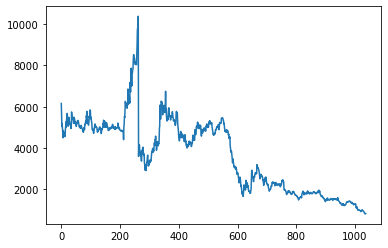

In [182]:
plt.plot(range(a0.shape[0]),a0['Close'])

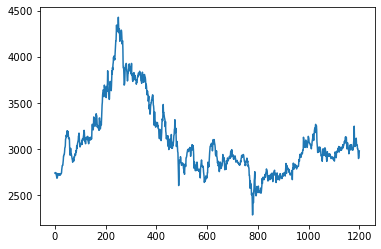

In [180]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(a0.shape[0]),a0['Close'])

In [51]:
df1.quantile([0.05])

,SecuritiesCode,CurrentFiscalYearStartDate,DisclosedDate,CurrentPeriodEndDate,NetSales,OperatingProfit,OrdinaryProfit,Profit,EarningsPerShare,TotalAssets,...,NumberOfTreasuryStockAtTheEndOfFiscalYear,AverageNumberOfShares,Close,Target,CMV,CMA,C_target,RMW,MLL,BM
0.05,2004.0,20160400.0,20170410.0,201700.0,460000000.0,-359000000.0,-350000064.0,-551999808.0,-53.290001,2.385000e+09,...,112.0,1930392.625,424.594557,-0.005868,1.236904e+10,-0.0802,-0.215435,-0.062667,-0.165357,0.12203


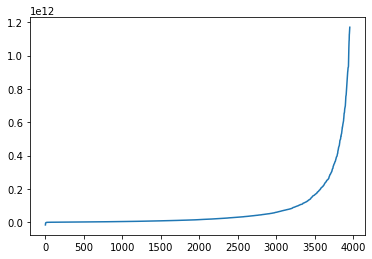

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
a0 = df1.groupby('SecuritiesCode')['Equity'].agg("last").reset_index().sort_values('Equity')
n = 100
plt.plot(range(df1['SecuritiesCode'].nunique()-n),a0['Equity'].tolist()[:-n])

In [45]:
df0[df0["Section"]=='Standard Market (Second Section)'].nunique()

DateCode                      105285
Date                            1202
SecuritiesCode                    90
Open                            4249
High                            4289
Low                             4233
Close                           4254
Volume                          9633
AdjustmentFactor                   9
ExpectedDividend                  86
SupervisionFlag                    2
Target                         46274
C*V                            75092
Section                            1
NewMarketSegment                   1
33SectorCode                      24
33SectorName                      24
17SectorCode                      15
17SectorName                      15
NewIndexSeriesSizeCode             1
NewIndexSeriesSize                 1
TradeDate                          2
Close_MarketCapitalization        88
IssuedShares                      90
MarketCapitalization              90
Turnover                       43792
trd_Date                         255
C

In [37]:
df1[df1['SecuritiesCode']==6502][['CurrentPeriodEndDate','Equity','TotalAssets','CMV',"BM",'RMW',"CMA","C_target"]]

,CurrentPeriodEndDate,ForecastProfit,Equity,TotalAssets,CMV,BM,RMW,CMA,C_target
2964,201610,NaN,2.992400e+10,5.120151e+12,NaN,NaN,NaN,NaN,NaN
3972,201701,2.300000e+11,-2.757040e+11,4.269513e+12,9.173749e+11,-0.300536,1.571073,-0.166135,NaN
8166,201704,2.300000e+11,-2.233910e+11,4.184746e+12,1.150470e+12,-0.194174,-0.225282,-0.019854,0.254089
11106,201707,-1.100000e+11,-4.168110e+11,4.074914e+12,1.288837e+12,-0.323401,0.240183,-0.026246,0.120271
15722,201710,5.200000e+11,2.208930e+11,4.490634e+12,1.350120e+12,0.163610,0.347802,0.102019,0.047549
20574,201801,1.070000e+12,1.010734e+12,4.458211e+12,1.550690e+12,0.651796,0.768718,-0.007220,0.148557
24599,201804,1.070000e+12,2.092743e+12,4.913180e+12,2.036700e+12,1.027517,0.485835,0.102052,0.313415
25931,201807,9.200000e+11,2.175713e+12,4.857451e+12,3.750001e+11,5.801899,0.030063,-0.011343,-0.815879
31019,201810,8.700000e+11,1.821401e+12,4.320729e+12,2.220280e+12,0.820347,-0.033223,-0.110495,4.920745
35613,201901,NaN,1.699045e+12,4.297344e+12,2.151325e+12,0.789767,-0.004925,-0.005412,-0.031057


In [9]:
df1[df1['SecuritiesCode']==1301][['CurrentPeriodEndDate','Equity','TotalAssets','CMV',"BM",'RMW',"CMA","C_target"]]

,CurrentPeriodEndDate,Equity,TotalAssets,CMV,BM,RMW,CMA,C_target
444,201610,2.577900e+10,1.171680e+11,NaN,NaN,NaN,NaN,NaN
5541,201701,2.539100e+10,9.739100e+10,3.109991e+10,0.816433,-0.001063,-0.168792,NaN
10245,201704,2.556000e+10,1.074220e+11,3.232202e+10,0.790792,0.029499,0.102997,0.039296
11160,201707,2.669200e+10,1.198060e+11,3.434152e+10,0.777252,0.032931,0.115284,0.062480
16997,201710,2.820400e+10,1.245430e+11,4.068722e+10,0.693191,0.040810,0.039539,0.184782
18570,201801,2.924300e+10,1.063050e+11,4.082319e+10,0.716333,0.014602,-0.146439,0.003342
24794,201804,2.966700e+10,1.123670e+11,4.045398e+10,0.733352,0.018708,0.057025,-0.009044
28414,201807,3.025300e+10,1.218340e+11,3.519877e+10,0.859490,0.008892,0.084251,-0.129906
31057,201810,3.153300e+10,1.302460e+11,3.291298e+10,0.958072,0.053182,0.069045,-0.064939
35548,201901,3.199600e+10,1.146730e+11,3.187557e+10,1.003778,0.012908,-0.119566,-0.031520


In [10]:
df1[df1['SecuritiesCode']==3990][['CurrentPeriodEndDate','Equity','TotalAssets','CMV',"BM",'RMW',"CMA","C_target"]]

,CurrentPeriodEndDate,Equity,TotalAssets,CMV,BM,RMW,CMA,C_target
10984,201706,1.324000e+09,2.920000e+09,3.513200e+10,0.037686,0.052870,NaN,NaN
14535,201709,1.559000e+09,3.170000e+09,3.101157e+10,0.050272,0.057088,0.085616,-0.117284
18149,201800,1.657000e+09,3.265000e+09,3.105935e+10,0.053349,0.059143,0.029968,0.001541
21581,201803,1.806000e+09,3.657000e+09,3.024400e+10,0.059714,0.082503,0.120061,-0.026251
25534,201806,2.001000e+09,4.584000e+09,3.795068e+10,0.052726,0.097451,0.253486,0.254817
28830,201809,2.333000e+09,5.411000e+09,6.413510e+10,0.036376,0.109730,0.180410,0.689959
32509,201900,2.525000e+09,5.671000e+09,1.026965e+11,0.024587,0.066139,0.048050,0.601253
36095,201903,2.840000e+09,6.305000e+09,8.961862e+10,0.031690,0.095423,0.111797,-0.127345
39970,201906,3.197000e+09,6.561000e+09,9.106312e+10,0.035108,0.106037,0.040603,0.016118
43733,201909,3.421000e+09,7.186000e+09,9.609516e+10,0.035600,0.035077,0.095260,0.055259


In [15]:
a0 = df1[df1["SecuritiesCode"]==1301]
a0 = a0.loc[a0[['CMV','C_target']].dropna(how='any').index]
T,Y = a0['CMV'].values,a0['C_target'].values
T,Y = T-T.mean(), Y-Y.mean()
res = np.sum(T*Y)/(np.sqrt(np.sum(T**2))*np.sqrt(np.sum(Y**2))+1e-9 )
print(res)

0.32673671154094996


In [37]:
df1[df1["SecuritiesCode"]==4169][["CurrentPeriodEndDate","TotalAssets"]]

,CurrentPeriodEndDate,TotalAssets
58786,202010,1.967000e+09
62980,202101,2.072000e+09
67371,202104,2.562000e+09
70264,202107,2.684000e+09


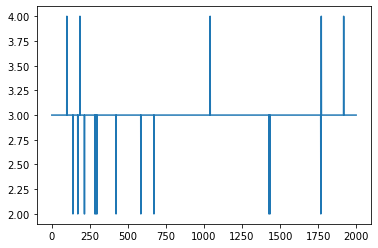

In [45]:
plt.plot(range(2000),totasset.iloc[-4:,:].isnull().sum().values[1:])

In [ ]:
import pandas as pd
import numpy as np
import datetime
import dateutil
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
bm=pd.read_csv("bm.csv")
cap=pd.read_csv("cap.csv")
ebit=pd.read_csv("EBIT.csv")
equity=pd.read_csv("Equity.csv")
totasset=pd.read_csv("TotAsset.csv")
close=pd.read_csv("close.csv") 

In [238]:
from collections import defaultdict
import tqdm
T_dict = defaultdict(int)
days = train_xy['Date'].nunique()
cols = [col for col in train_xy.drop(columns=['Date','Target','Close']).columns if train_xy[col].dtype!='object']
for name in tqdm.tqdm_notebook(train_xy['Date'].unique()):
    df = train_xy[train_xy['Date']==name]
    for col in cols:
        df0 = df.loc[df[[col,'Target']].dropna(how='any').index]
        T,Y = df0[col].values,df0['Target'].values
        T,Y = T-T.mean(), Y-Y.mean()
        T_dict[col] += np.sum(T*Y)/((np.sqrt(np.sum(T**2))*np.sqrt(np.sum(Y**2))+1e-9 )*days)
T_dict = dict(sorted(T_dict.items(),key=lambda x:abs(x[1]),reverse=True))
print(T_dict)

  0%|          | 0/1202 [00:00<?, ?it/s]

{'Close_MarketCapitalization': 0.008832162961300917, 'CityBKsRegionalBKsEtcBalance': 0.005762197037295722, 'EquityToAssetRatio': 0.005573231221447829, 'ForeignersBalance': 0.004915106330677185, 'InsuranceCosBalance': 0.004714294647160795, 'OtherFinancialInstitutionsBalance': 0.004689157117186317, 'TotalBalance': 0.004483380150949178, 'EarningsPerShare': 0.003744244873771121, 'ForecastDividendPerShare1stQuarter': 0.0037154699999916788, 'SecuritiesCosBalance': 0.003507238951916335, 'InvestmentTrustsBalance': 0.0033227359890363383, 'BrokerageBalance': 0.003219356446991506, 'Turnover': 0.0031234816734579006, 'SupervisionFlag': 0.002975452273700079, 'IndividualsBalance': 0.0024389831206893657, 'DisclosedDate': 0.0024131585567517583, 'ForecastEarningsPerShare': 0.0023911635211850157, 'TrustBanksBalance': 0.0021119831487087727, 'MarketCapitalization': 0.001142254426981619, 'MaterialChangesInSubsidiaries': 0.0011028391198205075, 'ChangesOtherThanOnesBasedOnRevisionsOfAccountingStandard': 0.000

In [257]:
from collections import defaultdict
import tqdm
T_dict = defaultdict(int)
days = train_xy['Date'].nunique()
cols = [col for col in train_xy.drop(columns=['Date','Target']).columns if train_xy[col].dtype!='object']
for name in tqdm.tqdm_notebook(train_xy['Date'].unique()):
    df = train_xy[train_xy['Date']==name]
    for col in cols:
        df0 = df.loc[df[[col,'Close']].dropna(how='any').index]
        T,Y = df0[col].values,df0['Close'].values
        T,Y = T-T.mean(), Y-Y.mean()
        T_dict[col] += np.sum(T*Y)/((np.sqrt(np.sum(T**2))*np.sqrt(np.sum(Y**2))+1e-9 )*days)
T_dict = dict(sorted(T_dict.items(),key=lambda x:abs(x[1]),reverse=True))
print(T_dict)

  0%|          | 0/1202 [00:00<?, ?it/s]

{'Close': 0.9991680532445916, 'Low': 0.9990537790362234, 'High': 0.9990534254178444, 'Open': 0.9989497930340259, 'Close_MarketCapitalization': 0.8142392854184017, 'ForecastEarningsPerShare': 0.6505936227789924, 'ForecastDividendPerShareAnnual': 0.6330834363474346, 'ResultDividendPerShare1stQuarter': 0.6178765886523776, 'ResultDividendPerShareAnnual': 0.6101547834957075, 'ForecastDividendPerShare2ndQuarter': 0.5680569982662037, 'EarningsPerShare': 0.5561693679130553, 'ResultDividendPerShare2ndQuarter': 0.5541327754165603, 'ForecastDividendPerShareFiscalYearEnd': 0.5430982535729245, 'ResultDividendPerShareFiscalYearEnd': 0.5405526724576096, 'ForecastDividendPerShare3rdQuarter': 0.5285124450631505, 'BookValuePerShare': 0.447486783793067, 'MarketCapitalization': 0.37969600416293875, 'BM': -0.21297846103241536, 'ForecastOperatingProfit': 0.19887120791189183, 'OperatingProfit': 0.19878802150467537, 'ForecastOrdinaryProfit': 0.1960133779975571, 'ForecastProfit': 0.16791316410368104, 'Ordinary

In [143]:
%matplotlib inline
import matplotlib.pyplot as plt

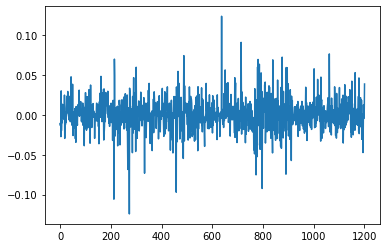

In [150]:
df0 = df[df['SecuritiesCode']==1954]
plt.plot(range(df0.shape[0]),df0['Target'])

In [200]:
df = train_xy[train_xy['SecuritiesCode']==1301]
df0 = df.loc[df[['IndividualsTotal','Close']].dropna(how='any').index]
T,Y = df0['IndividualsTotal'].values,df0['Close'].values
T,Y = T-T.mean(), Y-Y.mean()
pearson0 = np.sum(T*Y)/(np.sqrt(np.sum(T**2))*np.sqrt(np.sum(Y**2))+1e-9 )
print(pearson0)

0.15902268963214541


In [4]:
df = pd.merge(train_fin,stock_list,how='left',on='SecuritiesCode')

In [28]:
df[df['SecuritiesCode']==3353.0][['Date','Equity','IssuedShares','TypeOfCurrentPeriod','ForecastNetSales','NetSales','OperatingProfit','OrdinaryProfit','Profit','EarningsPerShare','BookValuePerShare']]

,Date,Equity,IssuedShares,TypeOfCurrentPeriod,ForecastNetSales,NetSales,OperatingProfit,OrdinaryProfit,Profit,EarningsPerShare,BookValuePerShare
1,2017-01-04,7566000000,4070000.0,3Q,30200000000,22128000000,820000000,778000000,629000000,328.57,NaN
3984,2017-02-22,NaN,4070000.0,FY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4681,2017-04-07,8095000000,4070000.0,FY,31100000000,29489000000,1200000000,1153000000,956000000,498.95,4225.0
9417,2017-06-30,8286000000,4070000.0,1Q,31100000000,7757000000,379000000,377000000,239000000,125.02,NaN
9860,2017-07-19,NaN,4070000.0,FY,31000000000,NaN,NaN,NaN,NaN,NaN,NaN
13688,2017-09-29,8944000000,4070000.0,2Q,31000000000,15456000000,735000000,718000000,765000000,399.25,NaN
18592,2018-01-05,9225000000,4070000.0,3Q,31000000000,23158000000,1164000000,1124000000,1051000000,548.63,NaN
23281,2018-04-09,9300000000,4070000.0,FY,31200000000,30914000000,1405000000,1384000000,1238000000,646.24,4854.02
27863,2018-07-02,9364000000,4070000.0,1Q,31200000000,7996000000,230000000,221000000,209000000,109.19,NaN
32077,2018-10-01,9485000000,4070000.0,2Q,31200000000,15668000000,470000000,482000000,386000000,201.49,NaN


In [25]:
Out[23]['Profit'].astype(float)/Out[23]['EarningsPerShare'].astype(float)

1        1.914356e+06
3984              NaN
4681     1.916024e+06
9417     1.911694e+06
9860              NaN
13688    1.916093e+06
18592    1.915681e+06
23281    1.915697e+06
27863    1.914095e+06
32077    1.915728e+06
36722    1.913723e+06
41374    1.911804e+06
45980    1.905428e+06
50198    1.903255e+06
54961    1.905495e+06
59775    1.903834e+06
64536    1.897381e+06
69176    1.890820e+06
74359    1.888712e+06
74592             NaN
79265    3.772053e+06
84030    3.746063e+06
88504    3.750527e+06
dtype: float64

In [29]:
Out[28]['Equity'].astype(float)/Out[28]['BookValuePerShare'].astype(float)

1                 NaN
3984              NaN
4681     1.915976e+06
9417              NaN
9860              NaN
13688             NaN
18592             NaN
23281    1.915938e+06
27863             NaN
32077             NaN
36722             NaN
41374    1.905999e+06
45980             NaN
50198             NaN
54961             NaN
59775    1.906011e+06
64536             NaN
69176             NaN
74359             NaN
74592             NaN
79265    3.756148e+06
84030             NaN
88504             NaN
dtype: float64

In [51]:
df[df['SecuritiesCode']==9990.0][['Equity','Profit','AverageNumberOfShares','EarningsPerShare','Date','BookValuePerShare','ResultDividendPerShareAnnual']]

,Equity,Profit,AverageNumberOfShares,EarningsPerShare,Date,BookValuePerShare,ResultDividendPerShareAnnual
921,25577000000,2026000000,29457899,68.8,2017-01-30,NaN,NaN
6890,26235000000,2658000000,29457822,90.25,2017-05-10,886.75,27.0
10523,25999000000,543000000,29457435,18.45,2017-07-28,NaN,NaN
15521,26634000000,1168000000,29457435,39.67,2017-10-31,NaN,NaN
19470,27139000000,1676000000,29457432,56.92,2018-01-30,NaN,NaN
25189,27634000000,2221000000,29457413,75.4,2018-05-09,934.46,27.0
28862,27294000000,453000000,29457317,15.38,2018-07-30,NaN,NaN
33707,27867000000,1051000000,29457287,35.69,2018-10-31,NaN,NaN
37548,28446000000,1605000000,29457243,54.49,2019-01-30,NaN,NaN
43847,29070000000,2177000000,29457200,73.93,2019-05-10,983.42,30.0


In [50]:
df0[df0['SecuritiesCode']==9990][['Date','Close_x']]

,Date,Close_x
1860,2017-01-04,1223.0
3725,2017-01-05,1266.0
5590,2017-01-06,1238.0
7455,2017-01-10,1215.0
9320,2017-01-11,1200.0
...,...,...
2324526,2021-11-29,528.0
2326526,2021-11-30,520.0
2328526,2021-12-01,522.0
2330526,2021-12-02,507.0


In [53]:
Out[50][Out[50]['Date']<'2017-05-11']

,Date,Close_x
1860,2017-01-04,1223.0
3725,2017-01-05,1266.0
5590,2017-01-06,1238.0
7455,2017-01-10,1215.0
9320,2017-01-11,1200.0
...,...,...
153283,2017-05-01,1284.0
155160,2017-05-02,1298.0
157037,2017-05-08,1317.0
158914,2017-05-09,1355.0


In [38]:
df0['SecuritiesCode']

0          1301
1          1332
2          1333
3          1376
4          1377
           ... 
2332526    9990
2332527    9991
2332528    9993
2332529    9994
2332530    9997
Name: SecuritiesCode, Length: 2332531, dtype: int64

In [7]:
df0=pd.merge(train_pr,stock_list,how='left',on='SecuritiesCode')

In [30]:
df0[['Date','TradeDate','Close_x','Close_y','Volume','AdjustmentFactor','ExpectedDividend','IssuedShares','MarketCapitalization']]

,Date,TradeDate,Close_x,Close_y,Volume,AdjustmentFactor,ExpectedDividend,IssuedShares,MarketCapitalization
0,2017-01-04,20211230.0,2742.0,3080.0,31400,1.0,NaN,10928283.0,3.365911e+10
1,2017-01-04,20211230.0,571.0,543.0,2798500,1.0,NaN,312430277.0,1.696496e+11
2,2017-01-04,20211230.0,3210.0,2405.0,270800,1.0,NaN,52656910.0,1.266399e+11
3,2017-01-04,20211230.0,1550.0,1504.0,11300,1.0,NaN,11772626.0,1.770603e+10
4,2017-01-04,20211230.0,3330.0,3285.0,150800,1.0,NaN,47410750.0,1.557443e+11
...,...,...,...,...,...,...,...,...,...
2332526,2021-12-03,20211230.0,528.0,518.0,44200,1.0,NaN,29859900.0,1.546743e+10
2332527,2021-12-03,20211230.0,794.0,825.0,35900,1.0,NaN,36436125.0,3.005980e+10
2332528,2021-12-03,20211230.0,1645.0,1626.0,7200,1.0,NaN,10960825.0,1.782230e+10
2332529,2021-12-03,20211230.0,2389.0,2447.0,6500,1.0,NaN,10847870.0,2.654474e+10


In [126]:
train_pr['Close'].quantile([0.5,0.95])

0.50    1811.0
0.95    6610.0
Name: Close, dtype: float64

In [17]:
df = train_pr[train_pr['SecuritiesCode']==1301]

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1865,20170105_1301,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,NaN,False,0.002920
3730,20170106_1301,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,NaN,False,-0.001092
5595,20170110_1301,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,1.0,NaN,False,-0.005100
7460,20170111_1301,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,1.0,NaN,False,-0.003295
...,...,...,...,...,...,...,...,...,...,...,...,...
2322531,20211129_1301,2021-11-29,1301,2975.0,2984.0,2951.0,2951.0,14300,1.0,NaN,False,0.003793
2324531,20211130_1301,2021-11-30,1301,2953.0,2997.0,2900.0,2900.0,20500,1.0,NaN,False,0.007558
2326531,20211201_1301,2021-12-01,1301,2909.0,2936.0,2909.0,2911.0,10600,1.0,NaN,False,0.016706
2328531,20211202_1301,2021-12-02,1301,2949.0,2973.0,2933.0,2933.0,15200,1.0,NaN,False,-0.003689


In [48]:
df = df[['Close','Target']].dropna(how='any')

In [19]:
df['Close'].values

array([2742., 2738., 2740., ..., 2911., 2933., 2982.])

In [113]:
d,pearson0 = 500,0
close = df['Close'].values
for i in range(df.shape[0]-1-d):
    T,Y = close[i:i+d],close[1+i:1+i+d]
    T,Y = T-T.mean(), Y-Y.mean()
    pearson0 += np.sum(T*Y)/(np.sqrt(np.sum(T**2))*np.sqrt(np.sum(Y**2))+1e-9 )
print(pearson0/i)

0.9862540080795974


In [116]:
d,pearson0 = 10,0
close = df['Close'].values
for i in range(df.shape[0]-d):
    T,Y = df['Close'].values[i:i+d],df['Target'].values[i:i+d]
    T,Y = T-T.mean(), Y-Y.mean()
    pearson0 += np.sum(T*Y)/(np.sqrt(np.sum(T**2))*np.sqrt(np.sum(Y**2))+1e-9 )
print(pearson0/i)

-0.2743982787623401


In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import re,os,random

train_pr = pd.read_csv("./train_files/stock_prices.csv",low_memory=False)
train_pr = train_pr[["Target","Date","Close"]]
train_pr['Date'] = train_pr['Date'].apply(lambda x :int(re.sub(r'[^a-zA-Z0-9]','',x)) )
sup_pr = pd.read_csv("./supplemental_files/stock_prices.csv",low_memory=False)
sup_pr['Date'] = sup_pr['Date'].apply(lambda x :int(re.sub(r'[^a-zA-Z0-9]','',x)) )
valid_df = sup_pr[["Target","Date","Close"]]
seq,batch_size,epochs,lr = 14,256,10,3e-4
device = 'cuda' if torch.cuda.is_available() else 'cpu'

def seed_torch(seed=42):   #torch使结果可复现
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed) # 为了禁止hash随机化，使得实验可复现
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    #torch.cuda.manual_seed_all(seed) # if you are using multi-GPU.
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.enabled = False
def calc_spread_return_sharpe(df: pd.DataFrame, portfolio_size: int = 200, toprank_weight_ratio: float = 2) -> float:
    """
    Args:
        df (pd.DataFrame): predicted results
        portfolio_size (int): # of equities to buy/sell
        toprank_weight_ratio (float): the relative weight of the most highly ranked stock compared to the least.
    Returns:
        (float): sharpe ratio
    输入是一个每天都包含2000支股票的rank+target的df，且如果仅有一天会std=0导致nan
    calc_spread_return_sharpe(df[['Date','SecuritiesCode','Rank','Target']], 200, 2)
    """
    def _calc_spread_return_per_day(df, portfolio_size, toprank_weight_ratio):
        #weights=[2,1]之间的200个点，计算前200个的purchase，后200个的short
        weights = np.linspace(start=toprank_weight_ratio, stop=1, num=portfolio_size)
        purchase = (df.sort_values(by="Prediction", ascending=False)['Target'][:portfolio_size] * weights).sum() / weights.mean()
        short = (df.sort_values(by="Prediction")['Target'][:portfolio_size] * weights).sum() / weights.mean()
        return purchase - short

    buf = df.groupby('Date').apply(_calc_spread_return_per_day, portfolio_size, toprank_weight_ratio)
    if df['Date'].nunique()==1:sharpe_ratio = buf.values[0]
    else:sharpe_ratio = buf.mean() / buf.std()
    return sharpe_ratio
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm0 = nn.LSTM(train_pr.shape[1]-2,8)
        self.lstm1 = nn.LSTM(8,1)
    def forward(self,X):   #输入一个【bz，seq，dim】
        X = X.permute(1,0,2)
        out = self.lstm0(X)
        out = self.lstm1(out[0])
        out = out[0].permute(1,0,2)
        return out.flatten(1)

def get_window(df):  #输入一个batch+seq-1的X，在里面滑窗成batch个[batch,seq,dim]与[batch,seq]
    X,T = [],[]
    for j in range(df.shape[0]-seq+1):
        xy = df.iloc[j: j+seq]
        _x,_y = xy.drop(columns=["Target","Date"]).values.tolist(), xy["Target"].values.tolist()
        X.append(_x)
        T.append(_y)
    return X,T
def evaluation_valid(model,valid_xy):  #重新想一个好的predict方式，联系train与valid
    y_pred = np.zeros([valid_xy.shape[0],])
    y_d = [i for i in range(1,seq)]+[seq]*(len(y_pred)-2*seq+2)+[seq-i for i in range(1,seq)]
    with torch.no_grad():
        for i in range( (valid_xy.shape[0]-seq+1)//batch_size+1):
            if (i+1)*batch_size==valid_xy.shape[0]+1:break
            batch = valid_xy.iloc[i*batch_size: (i+1)*batch_size+seq-1]
            X,T = get_window(batch)
            X,T = torch.tensor(X,dtype=torch.float32).to(device), torch.tensor(T,dtype=torch.float32).to(device)
            out = model(X)  #[bz,seq]放入y_
            loss = nn.MSELoss()(out, T )
            out = out.detach().cpu().numpy()
            for j in range(out.shape[0]):y_pred[i*batch_size+j: i*batch_size+seq+j] += out[j,:]
            torch.cuda.empty_cache()
    valid_ = valid_xy.copy()
    valid_["Prediction"] = y_pred/np.array(y_d)
    valid_ = valid_[["Date","Prediction","Target"]]
    score = calc_spread_return_sharpe(valid_, 200, 2)
    return score


b_score = 0
for random_seed in [42]:
    seed_torch(random_seed)
    train_df = train_pr.sample(frac=1,random_state=random_seed).fillna(0)
    model = model().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, eps=1e-30) #,weight_decay=0.001
    #model.train()
    print('================     random seed {}        ==============='.format(random_seed))
    for epoch in range(epochs):
        for i in tqdm.tqdm(range( (train_df.shape[0]-seq+1)//batch_size+1),desc=f'epoch{epoch+1}' ):
            if (i+1)*batch_size==train_df.shape[0]+1:break
            batch = train_df.iloc[i*batch_size: (i+1)*batch_size+seq-1]
            X,T = get_window(batch)
            X,T = torch.tensor(X,dtype=torch.float32).to(device), torch.tensor(T,dtype=torch.float32).to(device)
            out = model(X)
            loss = nn.MSELoss()(out, T )
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            torch.cuda.empty_cache()
        print("train_loss:", loss.item() )
        score = evaluation_valid(model,valid_df.fillna(0))
        print("valid_score:",score)
        if score>b_score:
            b_score = score
            torch.save(model.state_dict() , f"model{random_seed}.pth")  #model.load_state_dict(torch.load(model_dir + 'vgg_conv.pth'))


================     random seed 42        ===============


epoch1: 100%|███████████████████████████████| 9112/9112 [08:40<00:00, 17.49it/s]


train_loss: 0.0004694885283242911
valid_score: 0.12703156159346202


epoch2: 100%|███████████████████████████████| 9112/9112 [08:37<00:00, 17.60it/s]


train_loss: 0.0004333760298322886
valid_score: 0.15505748703245228


epoch3: 100%|███████████████████████████████| 9112/9112 [08:40<00:00, 17.50it/s]


train_loss: 0.0004336402053013444
valid_score: 0.24403246494179393


epoch4: 100%|███████████████████████████████| 9112/9112 [08:40<00:00, 17.49it/s]


train_loss: 0.0004337152058724314
valid_score: 0.2554190457764957


epoch5: 100%|███████████████████████████████| 9112/9112 [08:39<00:00, 17.54it/s]


train_loss: 0.00043369250488467515
valid_score: 0.24993458342289562


epoch6: 100%|███████████████████████████████| 9112/9112 [08:44<00:00, 17.36it/s]


train_loss: 0.00043385199387557805
valid_score: 0.15166414926533808


epoch7:   6%|█▊                              | 523/9112 [00:30<08:16, 17.31it/s]


KeyboardInterrupt: 

0          2017-01-04
1865       2017-01-05
3730       2017-01-06
5595       2017-01-10
7460       2017-01-11
              ...    
2322531    2021-11-29
2324531    2021-11-30
2326531    2021-12-01
2328531    2021-12-02
2330531    2021-12-03
Name: Date, Length: 1202, dtype: object


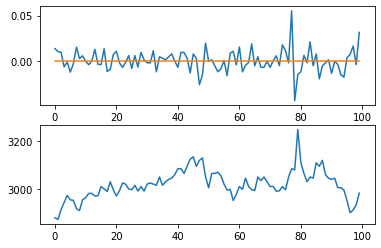

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
df = train_pr[train_pr['SecuritiesCode']==1301]
print(df['Date'])
plt.subplot(2,1,1)
plt.plot(df['Target'].tolist()[-100:])
plt.plot([0]*100)
plt.subplot(2,1,2)
plt.plot(df['Close'].tolist()[-100:])
plt.show()

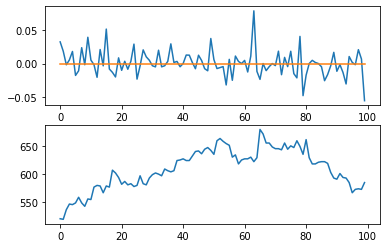

In [28]:
df = train_pr[train_pr['SecuritiesCode']==1332]
plt.subplot(2,1,1)
plt.plot(df['Target'].tolist()[-100:])
plt.plot([0]*100)
plt.subplot(2,1,2)
plt.plot(df['Close'].tolist()[-100:])
plt.show()

In [117]:
data

,DateCode,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,...,ForecastEarningsPerShare,ApplyingOfSpecificAccountingOfTheQuarterlyFinancialStatements,MaterialChangesInSubsidiaries,ChangesBasedOnRevisionsOfAccountingStandard,ChangesOtherThanOnesBasedOnRevisionsOfAccountingStandard,ChangesInAccountingEstimates,RetrospectiveRestatement,NumberOfIssuedAndOutstandingSharesAtTheEndOfFiscalYearIncludingTreasuryStock,NumberOfTreasuryStockAtTheEndOfFiscalYear,AverageNumberOfShares
0,20170104_1301,20170104,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,...,257.07,NaN,0.0,1.0,0.0,0.0,0.0,10928283.0,425510.0,10502960.0
1,20170104_1332,20170104,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,...,64.21,NaN,0.0,1.0,0.0,0.0,0.0,312430277.0,945671.0,296031140.0
2,20170104_1333,20170104,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,...,256.49,NaN,0.0,1.0,0.0,0.0,0.0,52656910.0,23097.0,52636988.0
3,20170104_1376,20170104,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,...,119.24,NaN,0.0,0.0,0.0,0.0,0.0,11772626.0,31402.0,11741309.0
4,20170104_1377,20170104,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,...,115.55,NaN,0.0,0.0,0.0,0.0,0.0,48410750.0,3408911.0,45002447.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2444526,20220228_9990,20220228,9990,511.0,518.0,509.0,516.0,120600,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2444527,20220228_9991,20220228,9991,823.0,825.0,814.0,822.0,16200,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2444528,20220228_9993,20220228,9993,1600.0,1622.0,1600.0,1600.0,4000,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2444529,20220228_9994,20220228,9994,2568.0,2568.0,2540.0,2565.0,9000,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
data_nan = dict(zip(data.columns.tolist(),data.isnull().sum().tolist()))

In [124]:
data_nan

{'DateCode': 0,
 'Date': 0,
 'SecuritiesCode': 0,
 'Open': 7892,
 'High': 7892,
 'Low': 7892,
 'Close': 7892,
 'Volume': 0,
 'AdjustmentFactor': 0,
 'ExpectedDividend': 2425163,
 'SupervisionFlag': 0,
 'Target': 238,
 'Section': 0,
 'NewMarketSegment': 0,
 '33SectorCode': 0,
 '33SectorName': 0,
 '17SectorCode': 0,
 '17SectorName': 0,
 'NewIndexSeriesSizeCode': 0,
 'NewIndexSeriesSize': 0,
 'TradeDate': 0,
 'Close_MarketCapitalization': 0,
 'IssuedShares': 0,
 'MarketCapitalization': 0,
 'TotalSales': 10000,
 'TotalPurchases': 10000,
 'TotalTotal': 10000,
 'TotalBalance': 10000,
 'ProprietarySales': 10000,
 'ProprietaryPurchases': 10000,
 'ProprietaryTotal': 10000,
 'ProprietaryBalance': 10000,
 'BrokerageSales': 10000,
 'BrokeragePurchases': 10000,
 'BrokerageTotal': 10000,
 'BrokerageBalance': 10000,
 'IndividualsSales': 10000,
 'IndividualsPurchases': 10000,
 'IndividualsTotal': 10000,
 'IndividualsBalance': 10000,
 'ForeignersSales': 10000,
 'ForeignersPurchases': 10000,
 'Foreigner

In [60]:
train_trd.dropna(how='any')

,Date,StartDate,EndDate,Section,TotalSales,TotalPurchases,TotalTotal,TotalBalance,ProprietarySales,ProprietaryPurchases,...,CityBKsRegionalBKsEtcTotal,CityBKsRegionalBKsEtcBalance,TrustBanksSales,TrustBanksPurchases,TrustBanksTotal,TrustBanksBalance,OtherFinancialInstitutionsSales,OtherFinancialInstitutionsPurchases,OtherFinancialInstitutionsTotal,OtherFinancialInstitutionsBalance
6,2017-01-13,2017-01-04,2017-01-06,Growth Market (Mothers/JASDAQ),4.592074e+08,4.593263e+08,9.185338e+08,118862.0,1.605747e+07,1.282267e+07,...,99878.0,-22676.0,4758211.0,5797986.0,10556197.0,1039775.0,21362.0,110809.0,132171.0,89447.0
7,2017-01-13,2017-01-04,2017-01-06,Prime Market (First Section),8.476800e+09,8.483346e+09,1.696015e+10,6546353.0,1.311271e+09,1.453327e+09,...,19450660.0,-1762918.0,292932297.0,245322795.0,538255092.0,-47609502.0,22410692.0,21764485.0,44175177.0,-646207.0
8,2017-01-13,2017-01-04,2017-01-06,Standard Market (Second Section),2.223549e+08,2.217707e+08,4.441256e+08,-584153.0,1.309361e+07,6.535935e+06,...,39167.0,-34565.0,1328241.0,1807118.0,3135359.0,478877.0,48202.0,36455.0,84657.0,-11747.0
12,2017-01-19,2017-01-10,2017-01-13,Growth Market (Mothers/JASDAQ),5.375720e+08,5.374116e+08,1.074984e+09,-160453.0,1.633072e+07,1.293260e+07,...,133723.0,25075.0,3217637.0,3798890.0,7016527.0,581253.0,76618.0,40048.0,116666.0,-36570.0
13,2017-01-19,2017-01-10,2017-01-13,Prime Market (First Section),1.042993e+10,1.042907e+10,2.085900e+10,-855001.0,1.759900e+09,1.716387e+09,...,38816727.0,-12301837.0,287358366.0,261144614.0,548502980.0,-26213752.0,12648955.0,15053471.0,27702426.0,2404516.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702,2021-11-25,2021-11-15,2021-11-19,Prime Market (First Section),1.546605e+10,1.545691e+10,3.092296e+10,-9140072.0,1.790466e+09,1.681088e+09,...,74105212.0,-48483266.0,390804197.0,515277222.0,906081419.0,124473025.0,18327909.0,10926282.0,29254191.0,-7401627.0
1703,2021-11-25,2021-11-15,2021-11-19,Standard Market (Second Section),1.524043e+08,1.529413e+08,3.053457e+08,536995.0,4.172230e+06,4.049447e+06,...,63269.0,-63269.0,609356.0,608800.0,1218156.0,-556.0,12922.0,103605.0,116527.0,90683.0
1708,2021-12-02,2021-11-22,2021-11-26,Growth Market (Mothers/JASDAQ),1.143466e+09,1.143923e+09,2.287389e+09,456677.0,3.663919e+07,3.496068e+07,...,396230.0,-275608.0,6696755.0,6886122.0,13582877.0,189367.0,234653.0,298525.0,533178.0,63872.0
1709,2021-12-02,2021-11-22,2021-11-26,Prime Market (First Section),1.138343e+10,1.137621e+10,2.275964e+10,-7214179.0,1.499660e+09,1.230944e+09,...,35957940.0,-17510292.0,254580089.0,261919512.0,516499601.0,7339423.0,11959898.0,16368287.0,28328185.0,4408389.0
